In [288]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
# plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

In [289]:
# p11 = "experiments/device/nov_21/pV_16-1.txt"
# p22 = "experiments/device/nov_21/pV_16-1.csv"

In [290]:
p11 = "experiments/device/nov_21/pV_8-1.txt"
p22 = "experiments/device/nov_21/pV_8-1.csv"

In [291]:
# p11 = "experiments/device/nov_21/pV_4-2.txt"
# p22 = "experiments/device/nov_21/pV_4-2_1.csv"

photo 1

In [292]:
def add_skipped(l, n=11):
    return l + [float('nan')] * (n - len(l))
def drop_nan(m):
    return m[~np.isnan(m).any(axis=1)]


In [293]:
p = "experiments/device/nov_21/IMG_20241123_025631.TXT"
f = open(p, "r")
data = np.array([add_skipped([float('nan') if j == "" else float(j)  for j in i.strip().split("\t")]) for i in f.readlines()[3:]])[:, 1:]

In [294]:
Axy_s = drop_nan(data[:, [0, 1]])[1:, :]
Bxy_s = drop_nan(data[:, [2, 3]])
Cxy_s = drop_nan(data[:, [4, 5]])
Dxy_s = drop_nan(data[:, [6, 7]])
Exy_s = drop_nan(data[:, [8, 9]])[1:, :]

# real_dst = 20
# b_r_dst = np.linalg.norm(Cxy_s[0] - Cxy_s[1])
# b_to_cm = real_dst/b_r_dst

# s_dst = Bxy_s[0, 0] - Bxy_s[2, 0]
# b_dst = Dxy_s[0, 0] - Dxy_s[2, 0]

# s_to_b = b_dst/s_dst

# s_to_cm = s_to_b*b_to_cm

pnts_s = Axy_s
ref_pnts_s = Bxy_s
ref_V = np.array([0, 0.5, 1, 1.5])*1000 * 470/500 +190
pnts_2_s = Exy_s


In [295]:
ref_V

array([ 190.,  660., 1130., 1600.])

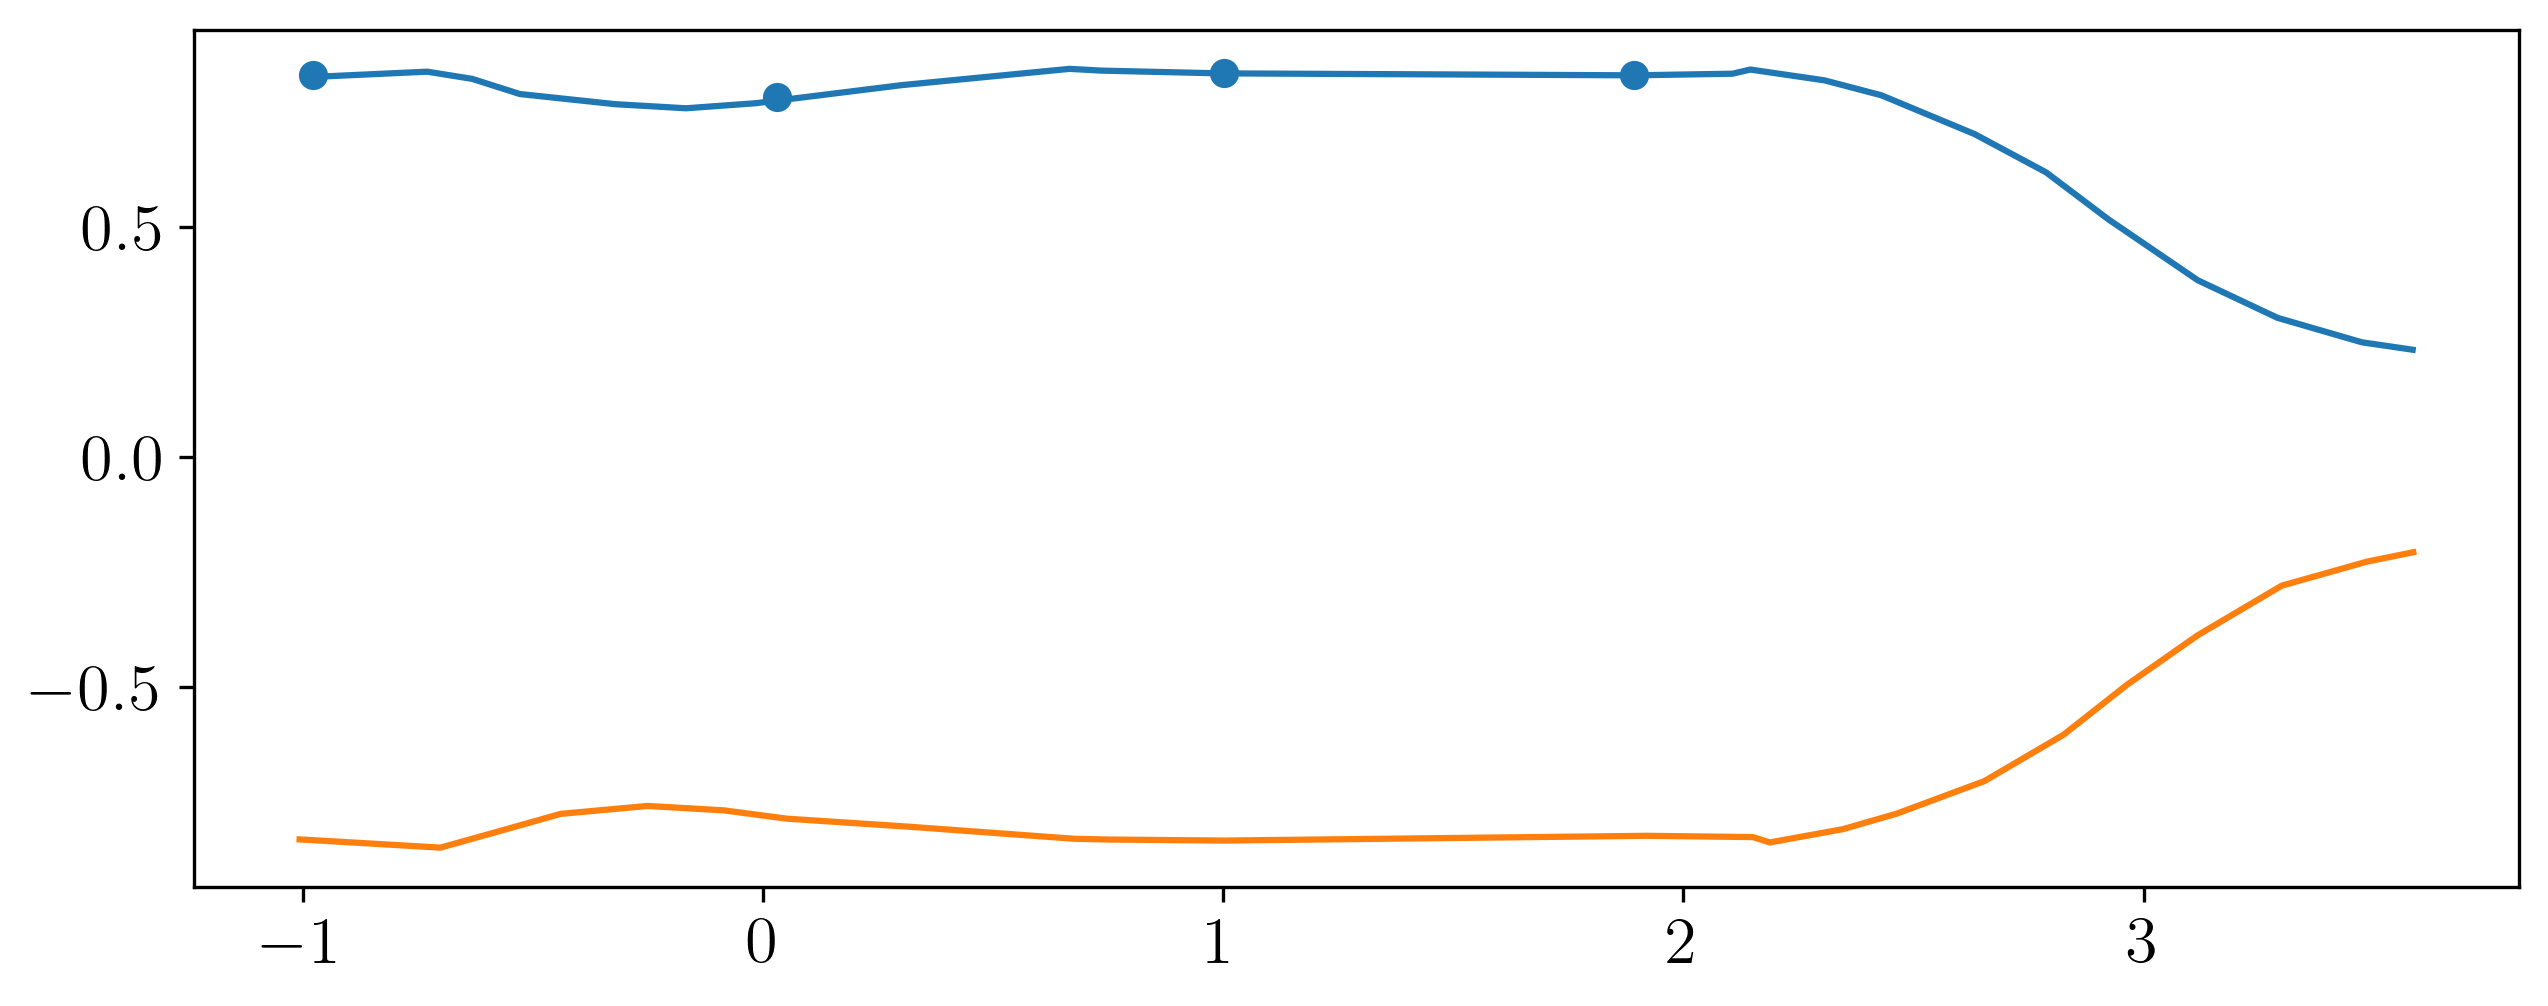

In [296]:
plt.plot(pnts_s[:, 0], pnts_s[:, 1])
plt.plot(pnts_2_s[:, 0], pnts_2_s[:, 1])
plt.scatter(ref_pnts_s[:, 0], ref_pnts_s[:, 1])
plt.gca().set_aspect('equal')

In [297]:
r_interp_s = lambda xx: (np.interp(xx, pnts_s[:, 0], pnts_s[:, 1]) - np.interp(xx, pnts_2_s[:, 0], pnts_2_s[:, 1]))/2

In [298]:
from scipy.integrate import quad

In [299]:
def s_to_cm_nm(n, m):
    return np.power((ref_V[m] - ref_V[n]) / quad(lambda x: (r_interp_s(x)**2)*np.pi, ref_pnts_s[n, 0], ref_pnts_s[m, 0])[0], 1/3)

In [300]:
s_to_cm = (s_to_cm_nm(0, 1) + s_to_cm_nm(1, 2) + s_to_cm_nm(2, 3)) / 3

/tmp/ipykernel_708707/3109494096.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.power((ref_V[m] - ref_V[n]) / quad(lambda x: (r_interp_s(x)**2)*np.pi, ref_pnts_s[n, 0], ref_pnts_s[m, 0])[0], 1/3)


In [301]:
pnts = pnts_s * s_to_cm
pnts_2 = pnts_2_s * s_to_cm
ref_pnts = ref_pnts_s * s_to_cm

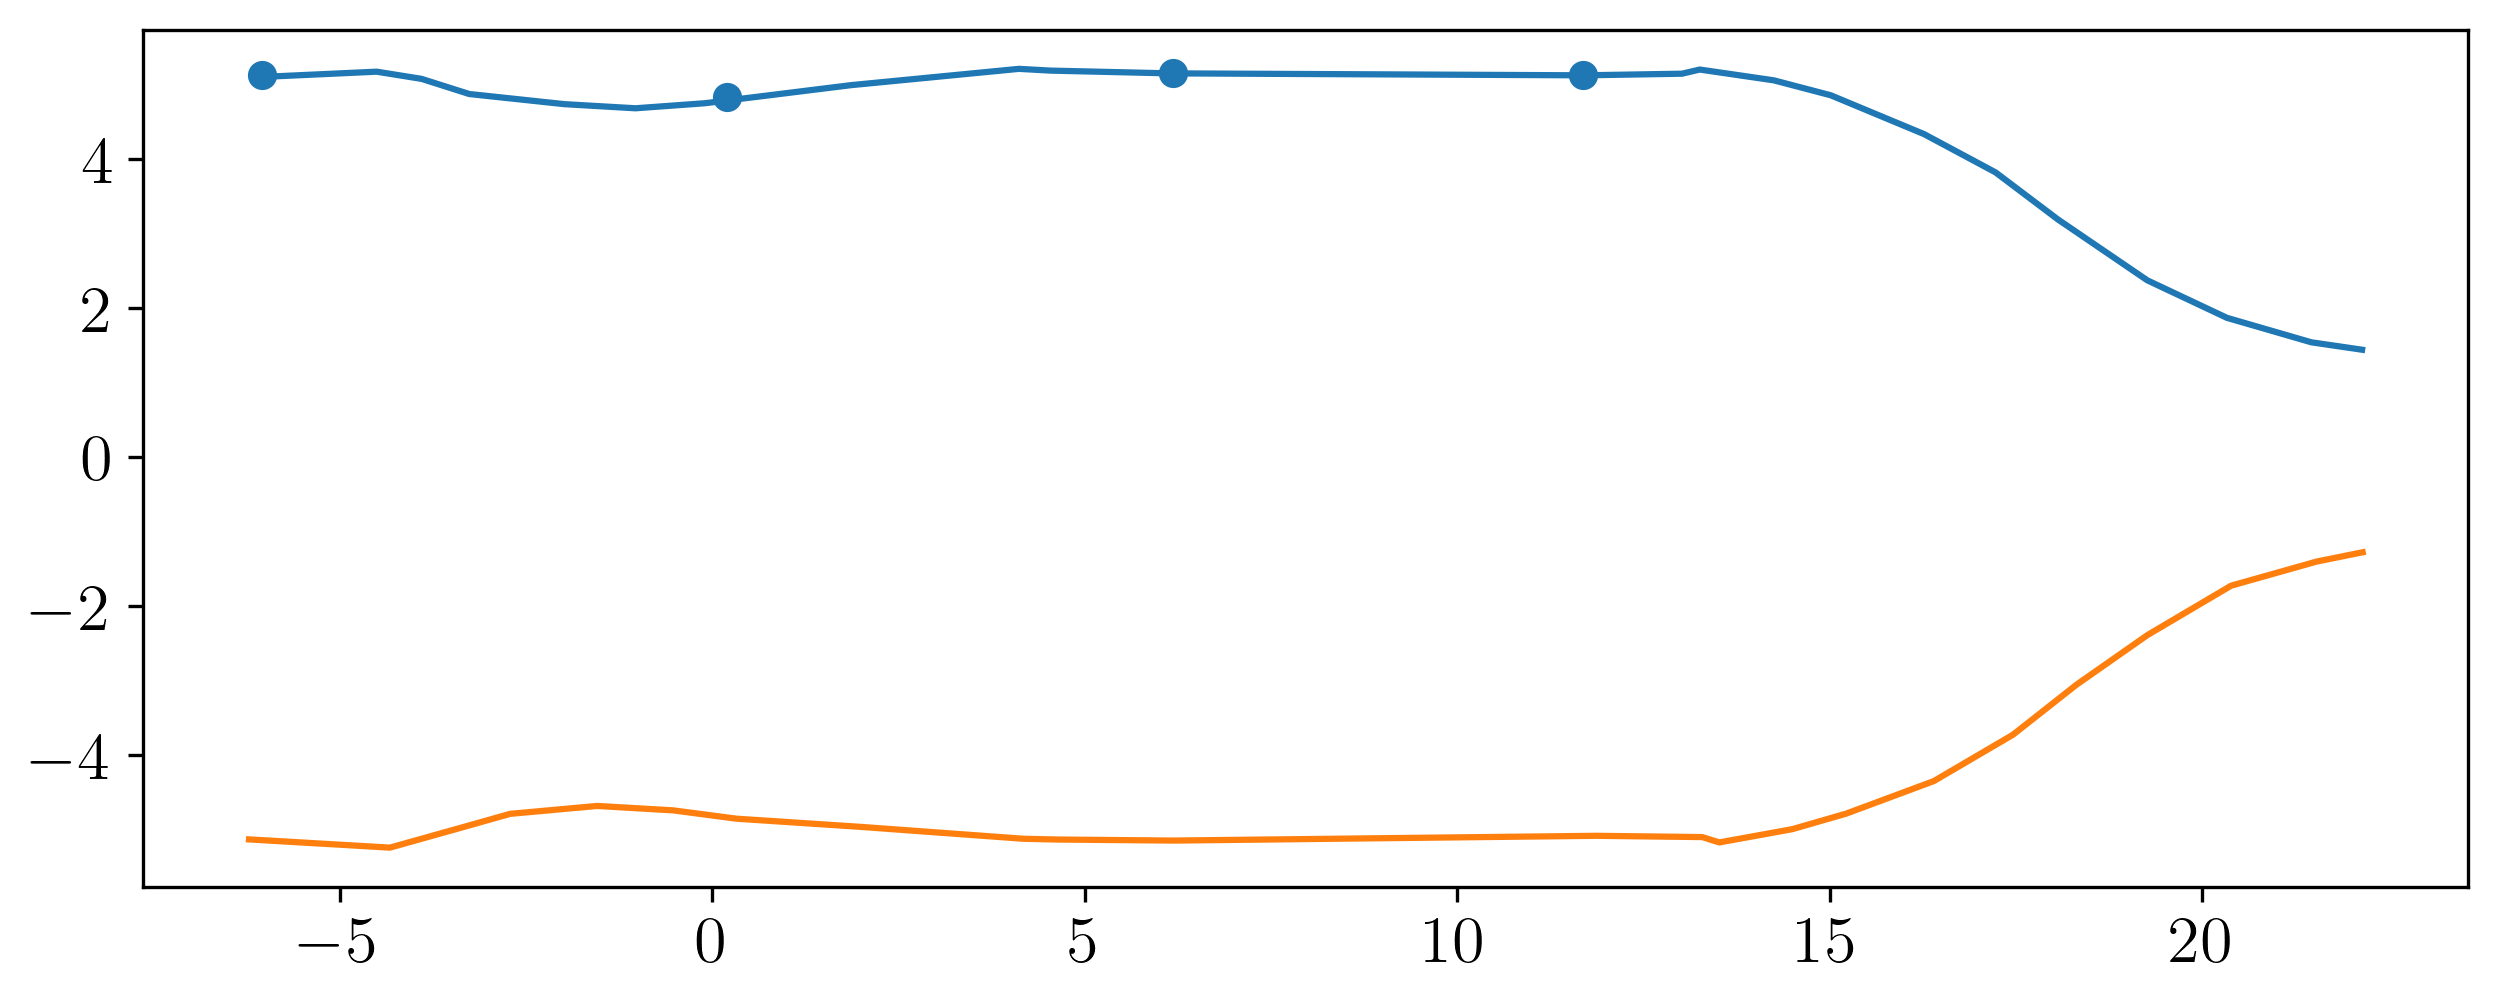

In [302]:
plt.plot(pnts[:, 0], pnts[:, 1])
plt.plot(pnts_2[:, 0], pnts_2[:, 1])
plt.scatter(ref_pnts[:, 0], ref_pnts[:, 1])
plt.gca().set_aspect('equal')

In [303]:
r_interp = lambda xx: (np.interp(xx, pnts[:, 0], pnts[:, 1]) - np.interp(xx, pnts_2[:, 0], pnts_2[:, 1]))/2

In [304]:
quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], ref_pnts[3, 0])[0]

/tmp/ipykernel_708707/2562518097.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], ref_pnts[3, 0])[0]


1410.5569748605205

In [305]:
ref_pnts

array([[-6.04666961,  5.12605317],
       [ 0.19146161,  4.83629579],
       [ 6.18842874,  5.15820691],
       [11.69120838,  5.1260402 ]])

Video 1

In [306]:

# p = "pV_4-2.txt"
f = open(p11, "r")
data = drop_nan(np.array([add_skipped([float('nan') if j == "" else float(j)  for j in i.strip().split("\t")], 3) for i in f.readlines()[3:]]))

In [307]:
t = data[:, 0]
X = data[:, 1]*s_to_cm
Y = data[:, 2]*s_to_cm

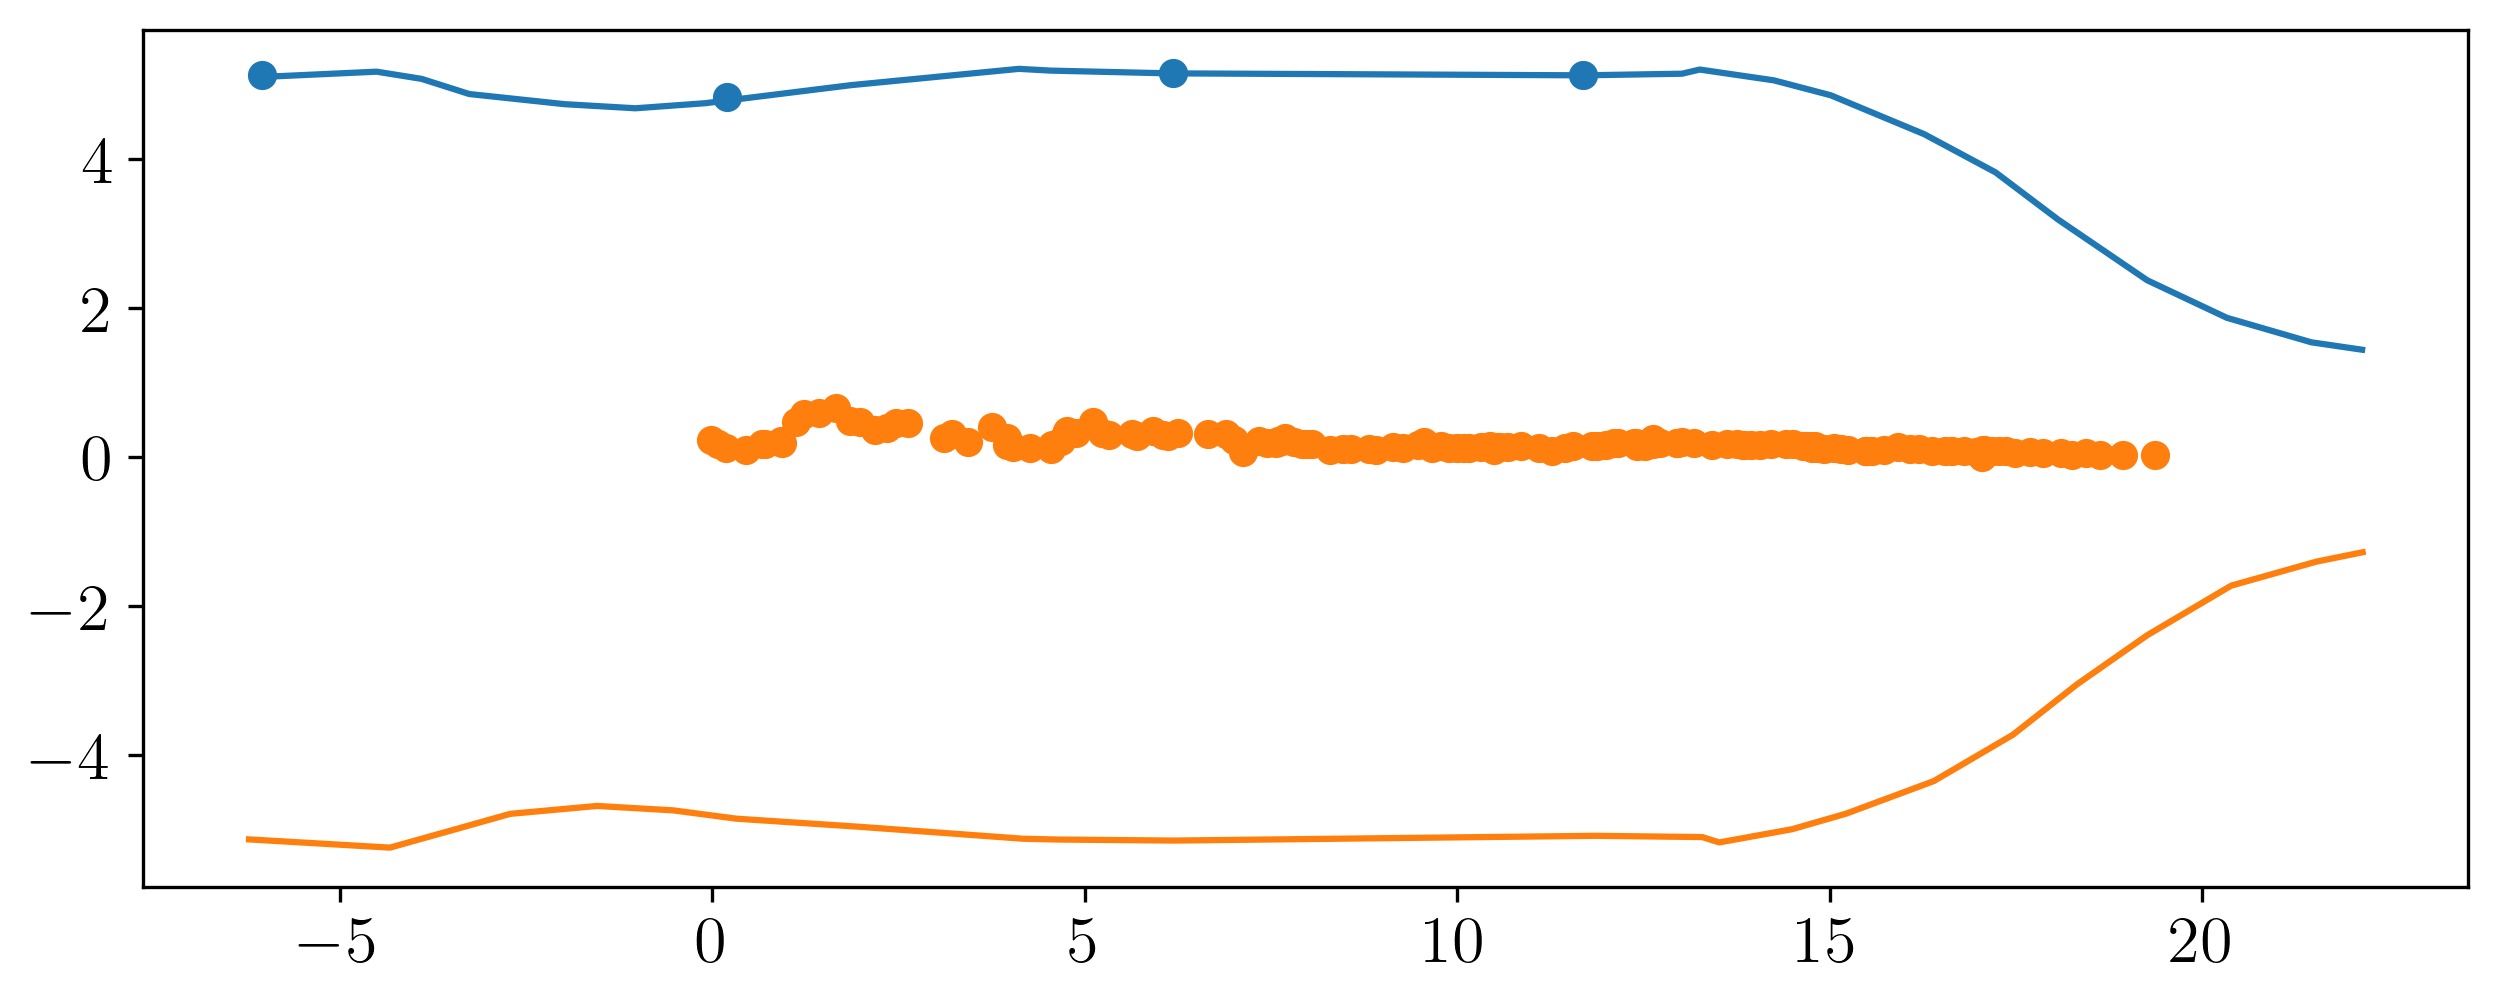

In [308]:
plt.plot(pnts[:, 0], pnts[:, 1])
plt.plot(pnts_2[:, 0], pnts_2[:, 1])
plt.scatter(ref_pnts[:, 0], ref_pnts[:, 1])
plt.scatter(X, Y)
plt.gca().set_aspect('equal')


In [309]:
Vs = np.array([quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], xx, )[0] for xx in X]) + ref_V[0]

/tmp/ipykernel_708707/254432389.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Vs = np.array([quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], xx, )[0] for xx in X]) + ref_V[0]
/tmp/ipykernel_708707/254432389.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Vs = np.array([quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], xx, )[0] for xx in X]) + ref_V[0]


In [310]:
if "8-1" in p11:
    T = t-27.5
if "4-2" in p11:
    T = t-27.5 + 8 - 0.15

if "16-1" in p11:
    T = t -102

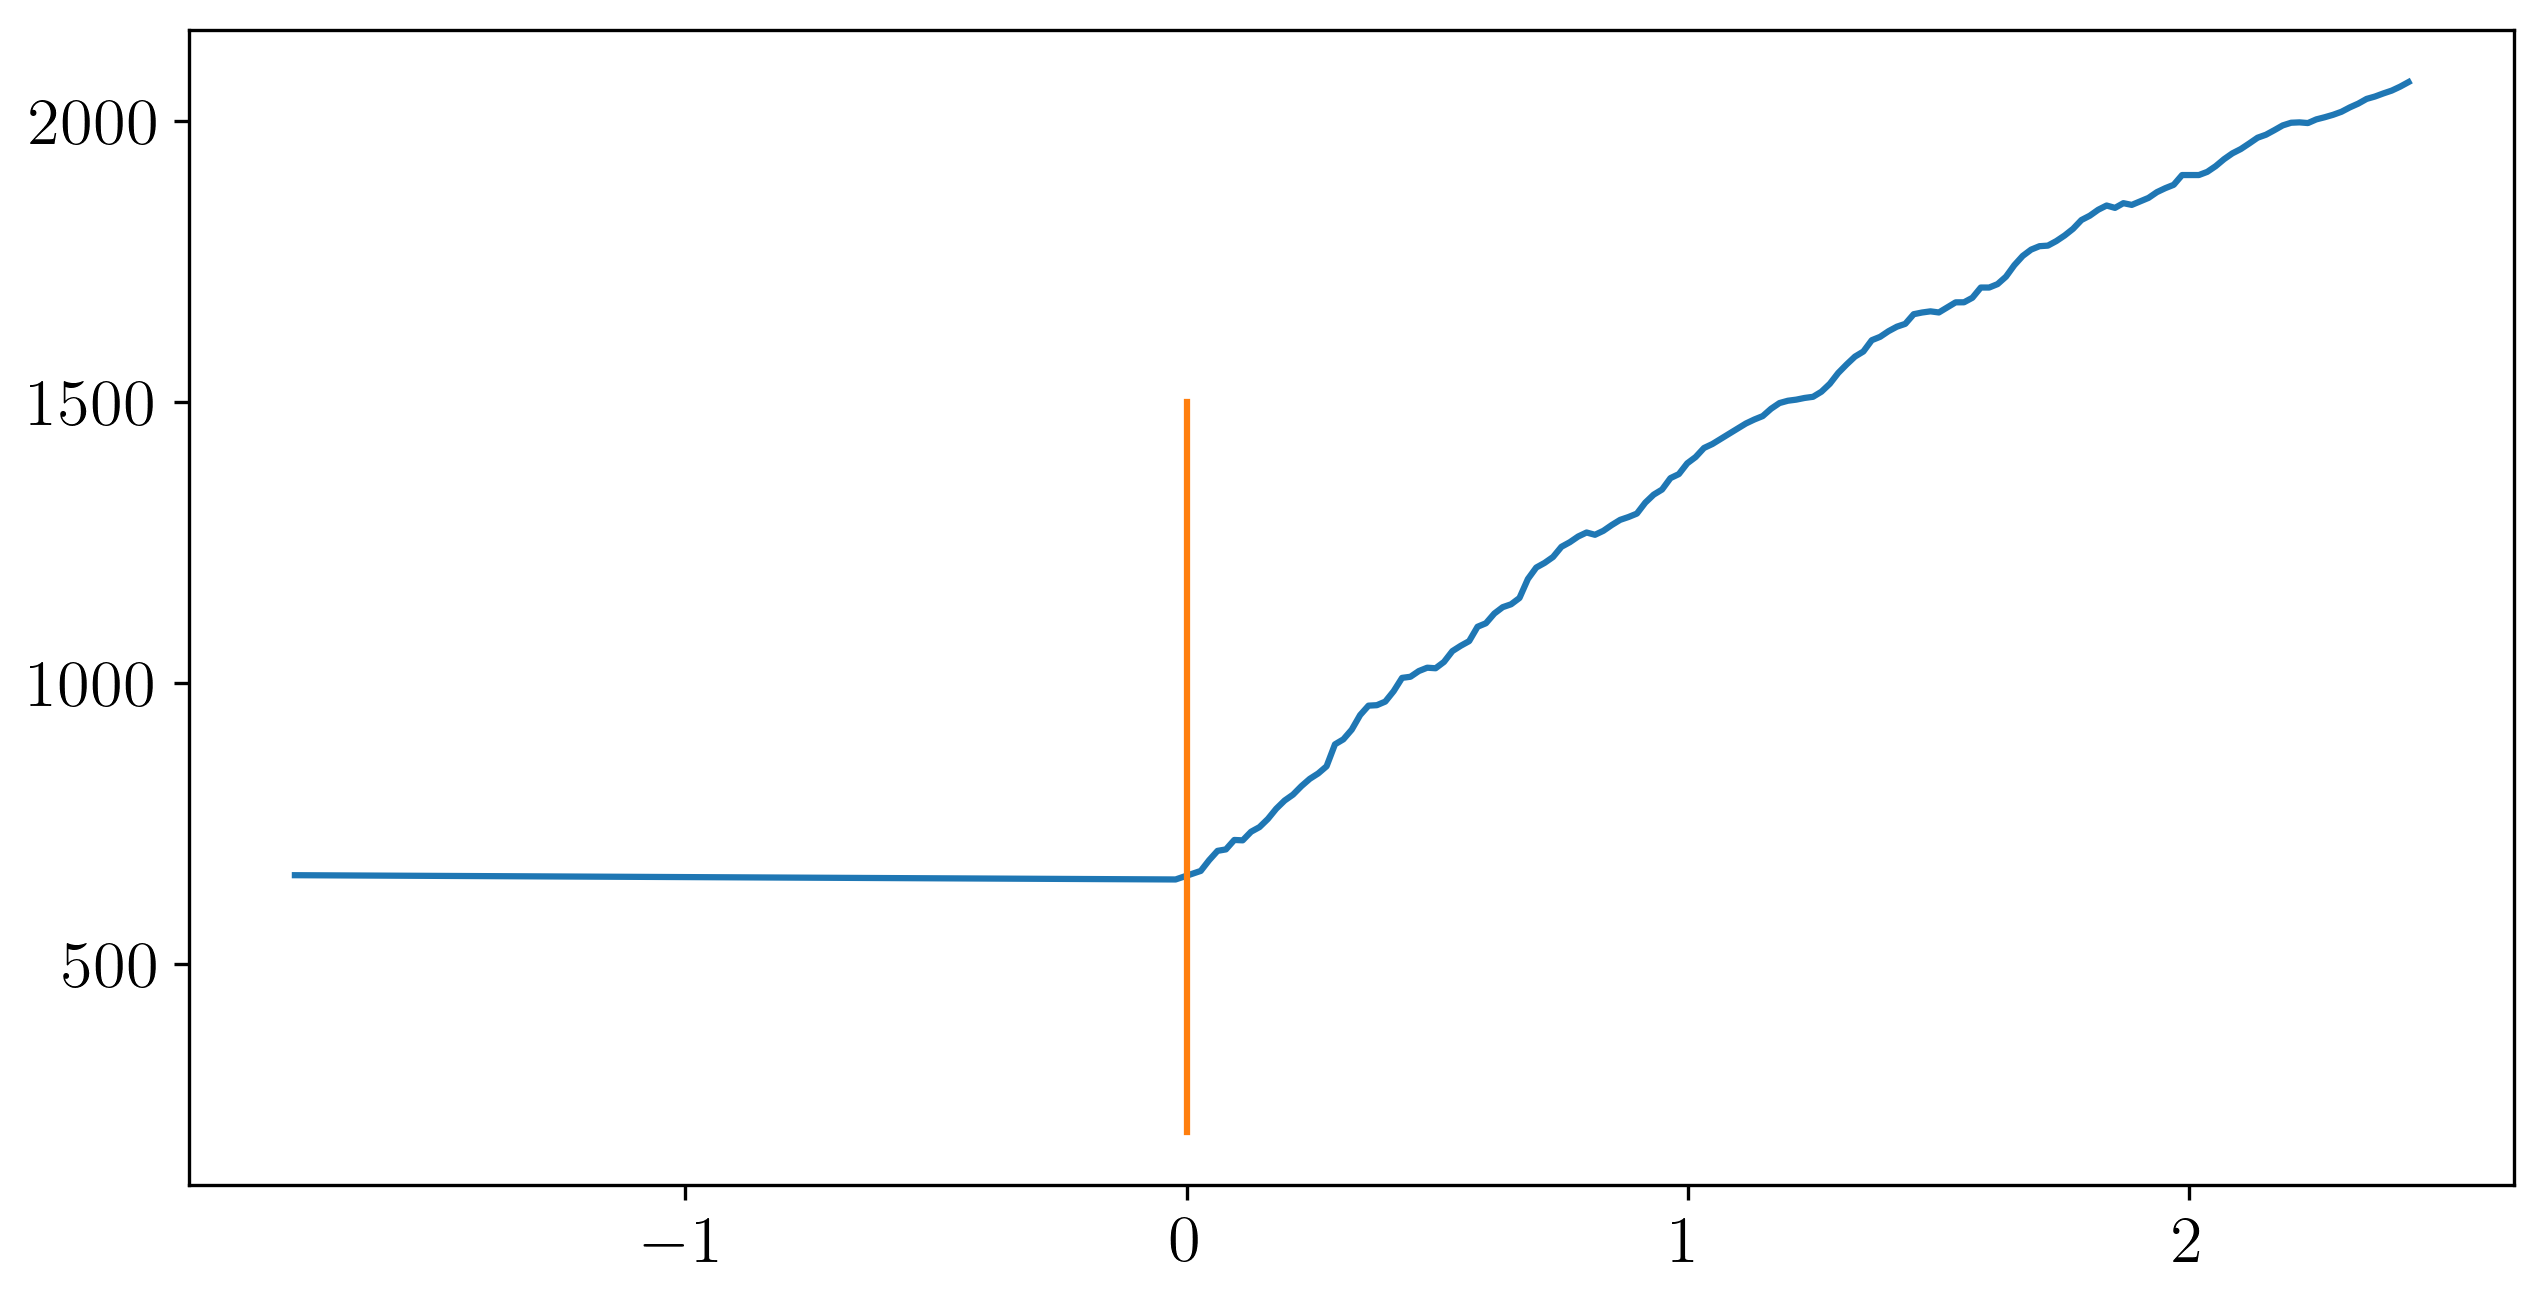

In [311]:
plt.plot(T, Vs)
plt.plot([0, 0], [200, 1500])

In [312]:

# p = "pV_4-2_1.csv"
f = open(p22, "r")
data_pico = np.array([[float('nan') if j == "" else float(j)  for j in i.strip().split(",")] for i in f.readlines()[3:]])
# data_pico = 

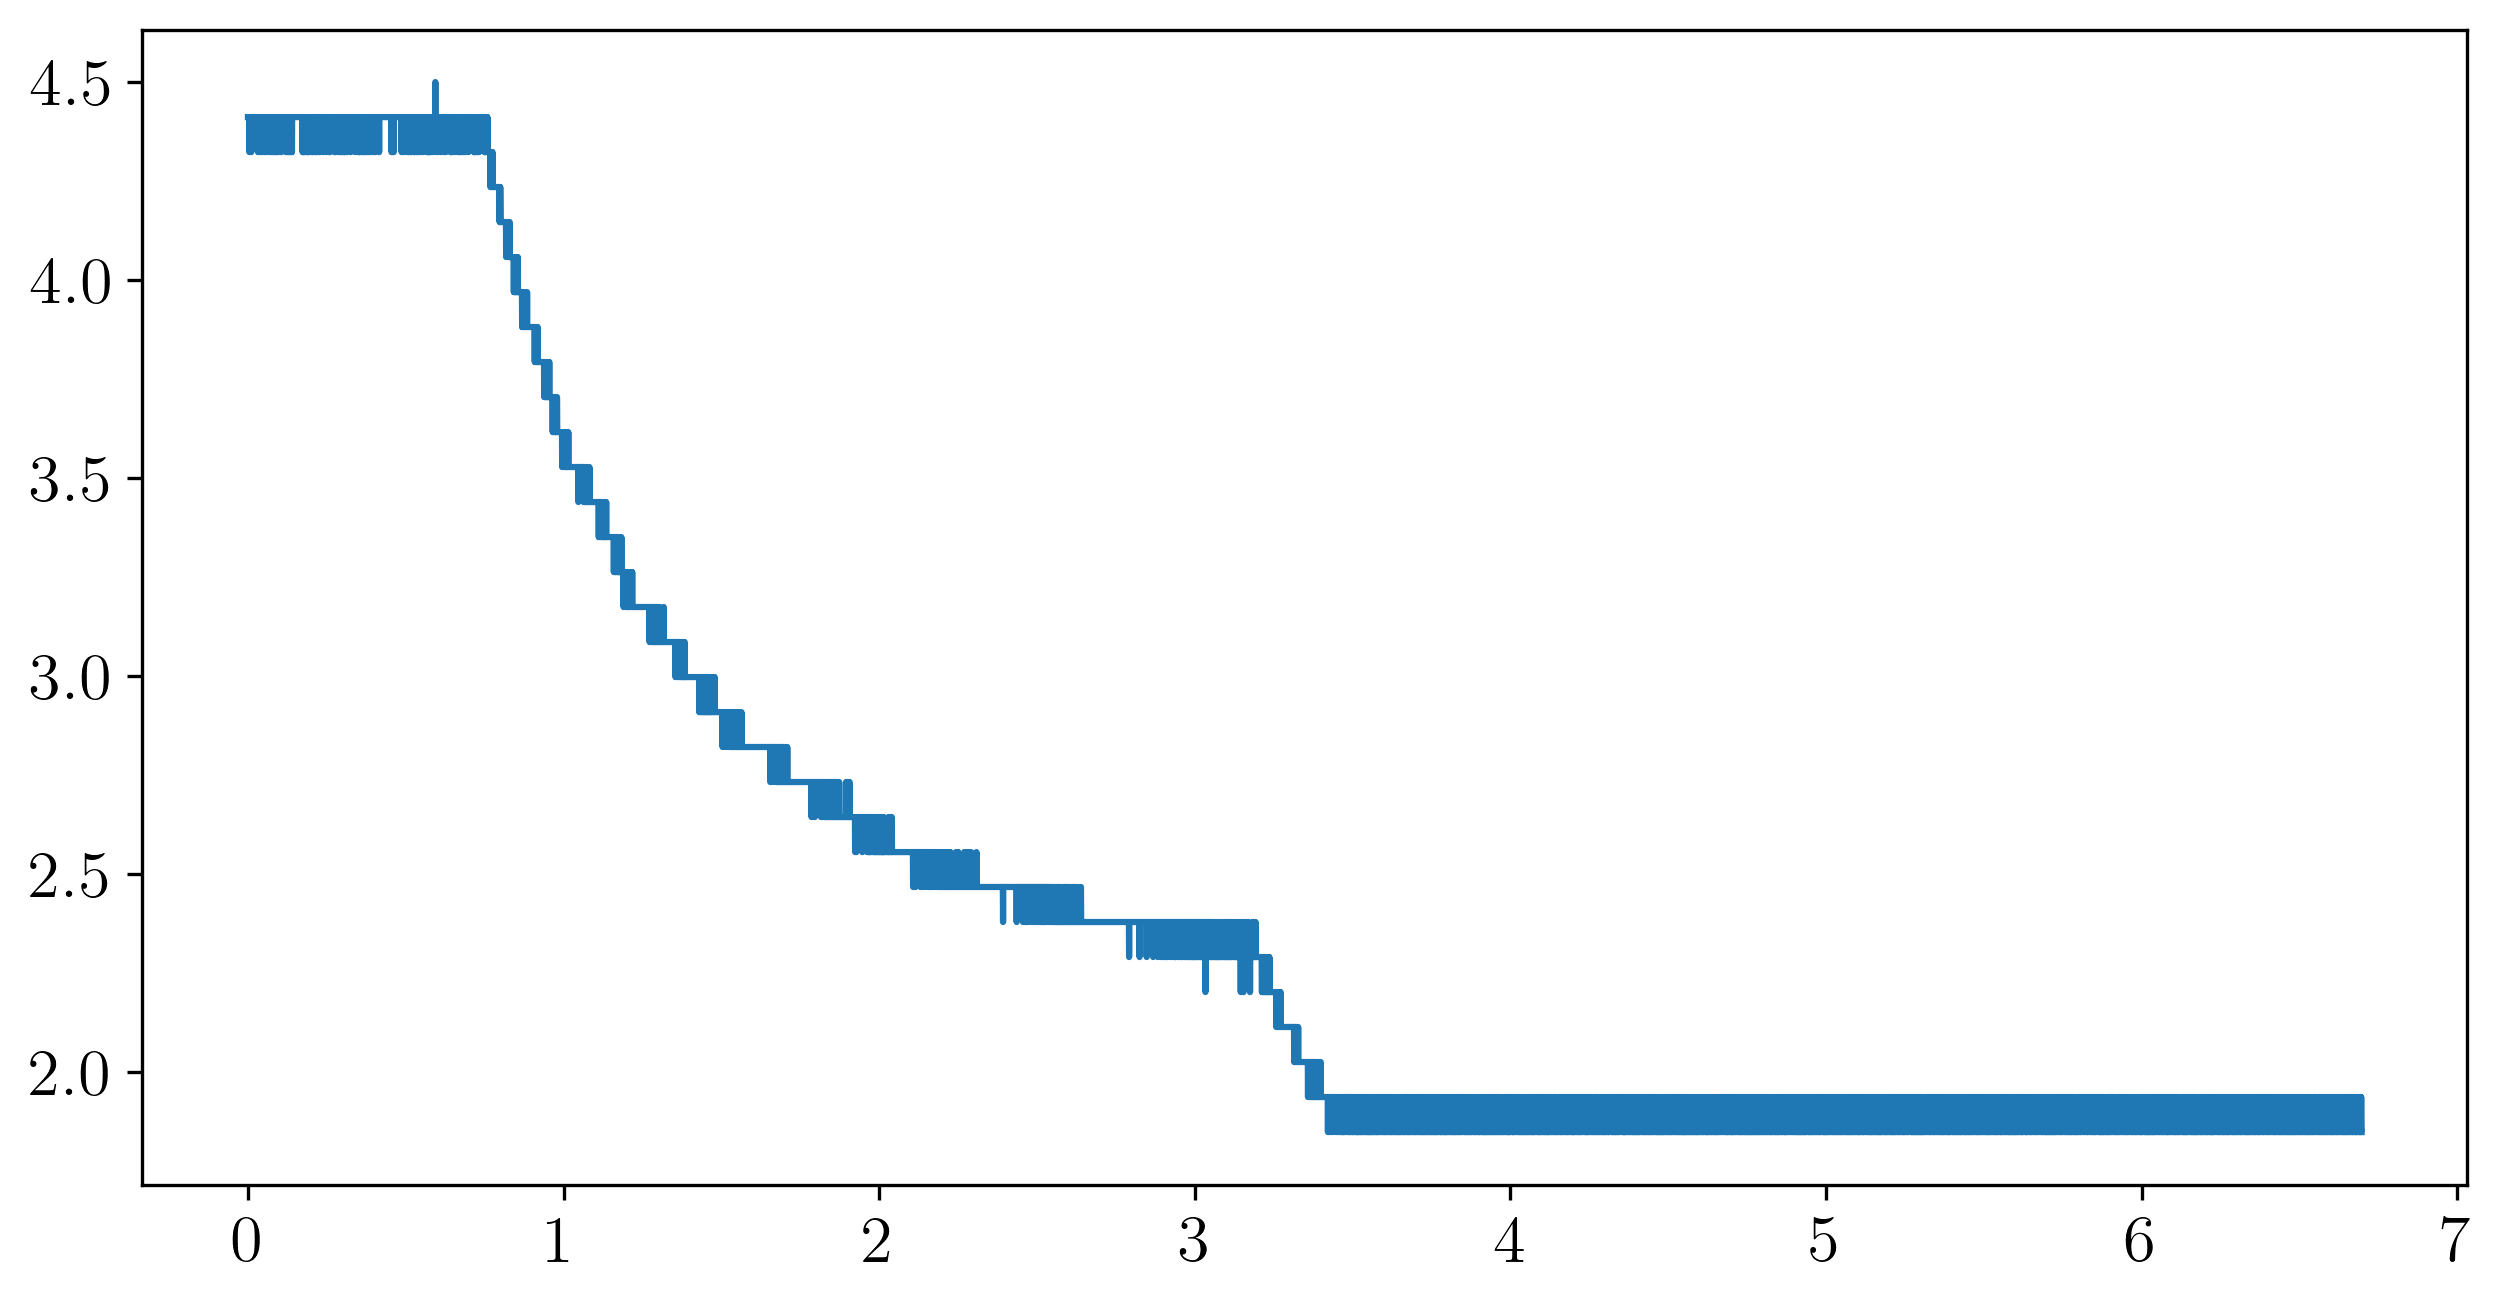

In [313]:
plt.plot(data_pico[:, 0], data_pico[:, 1])

In [314]:
from scipy import signal

In [315]:
def V_to_P(u):
    P_r = (u - 1.9815) / 0.4697 + 1
    return signal.filtfilt(*signal.butter(2, 0.02), P_r, padlen=150)
     
    

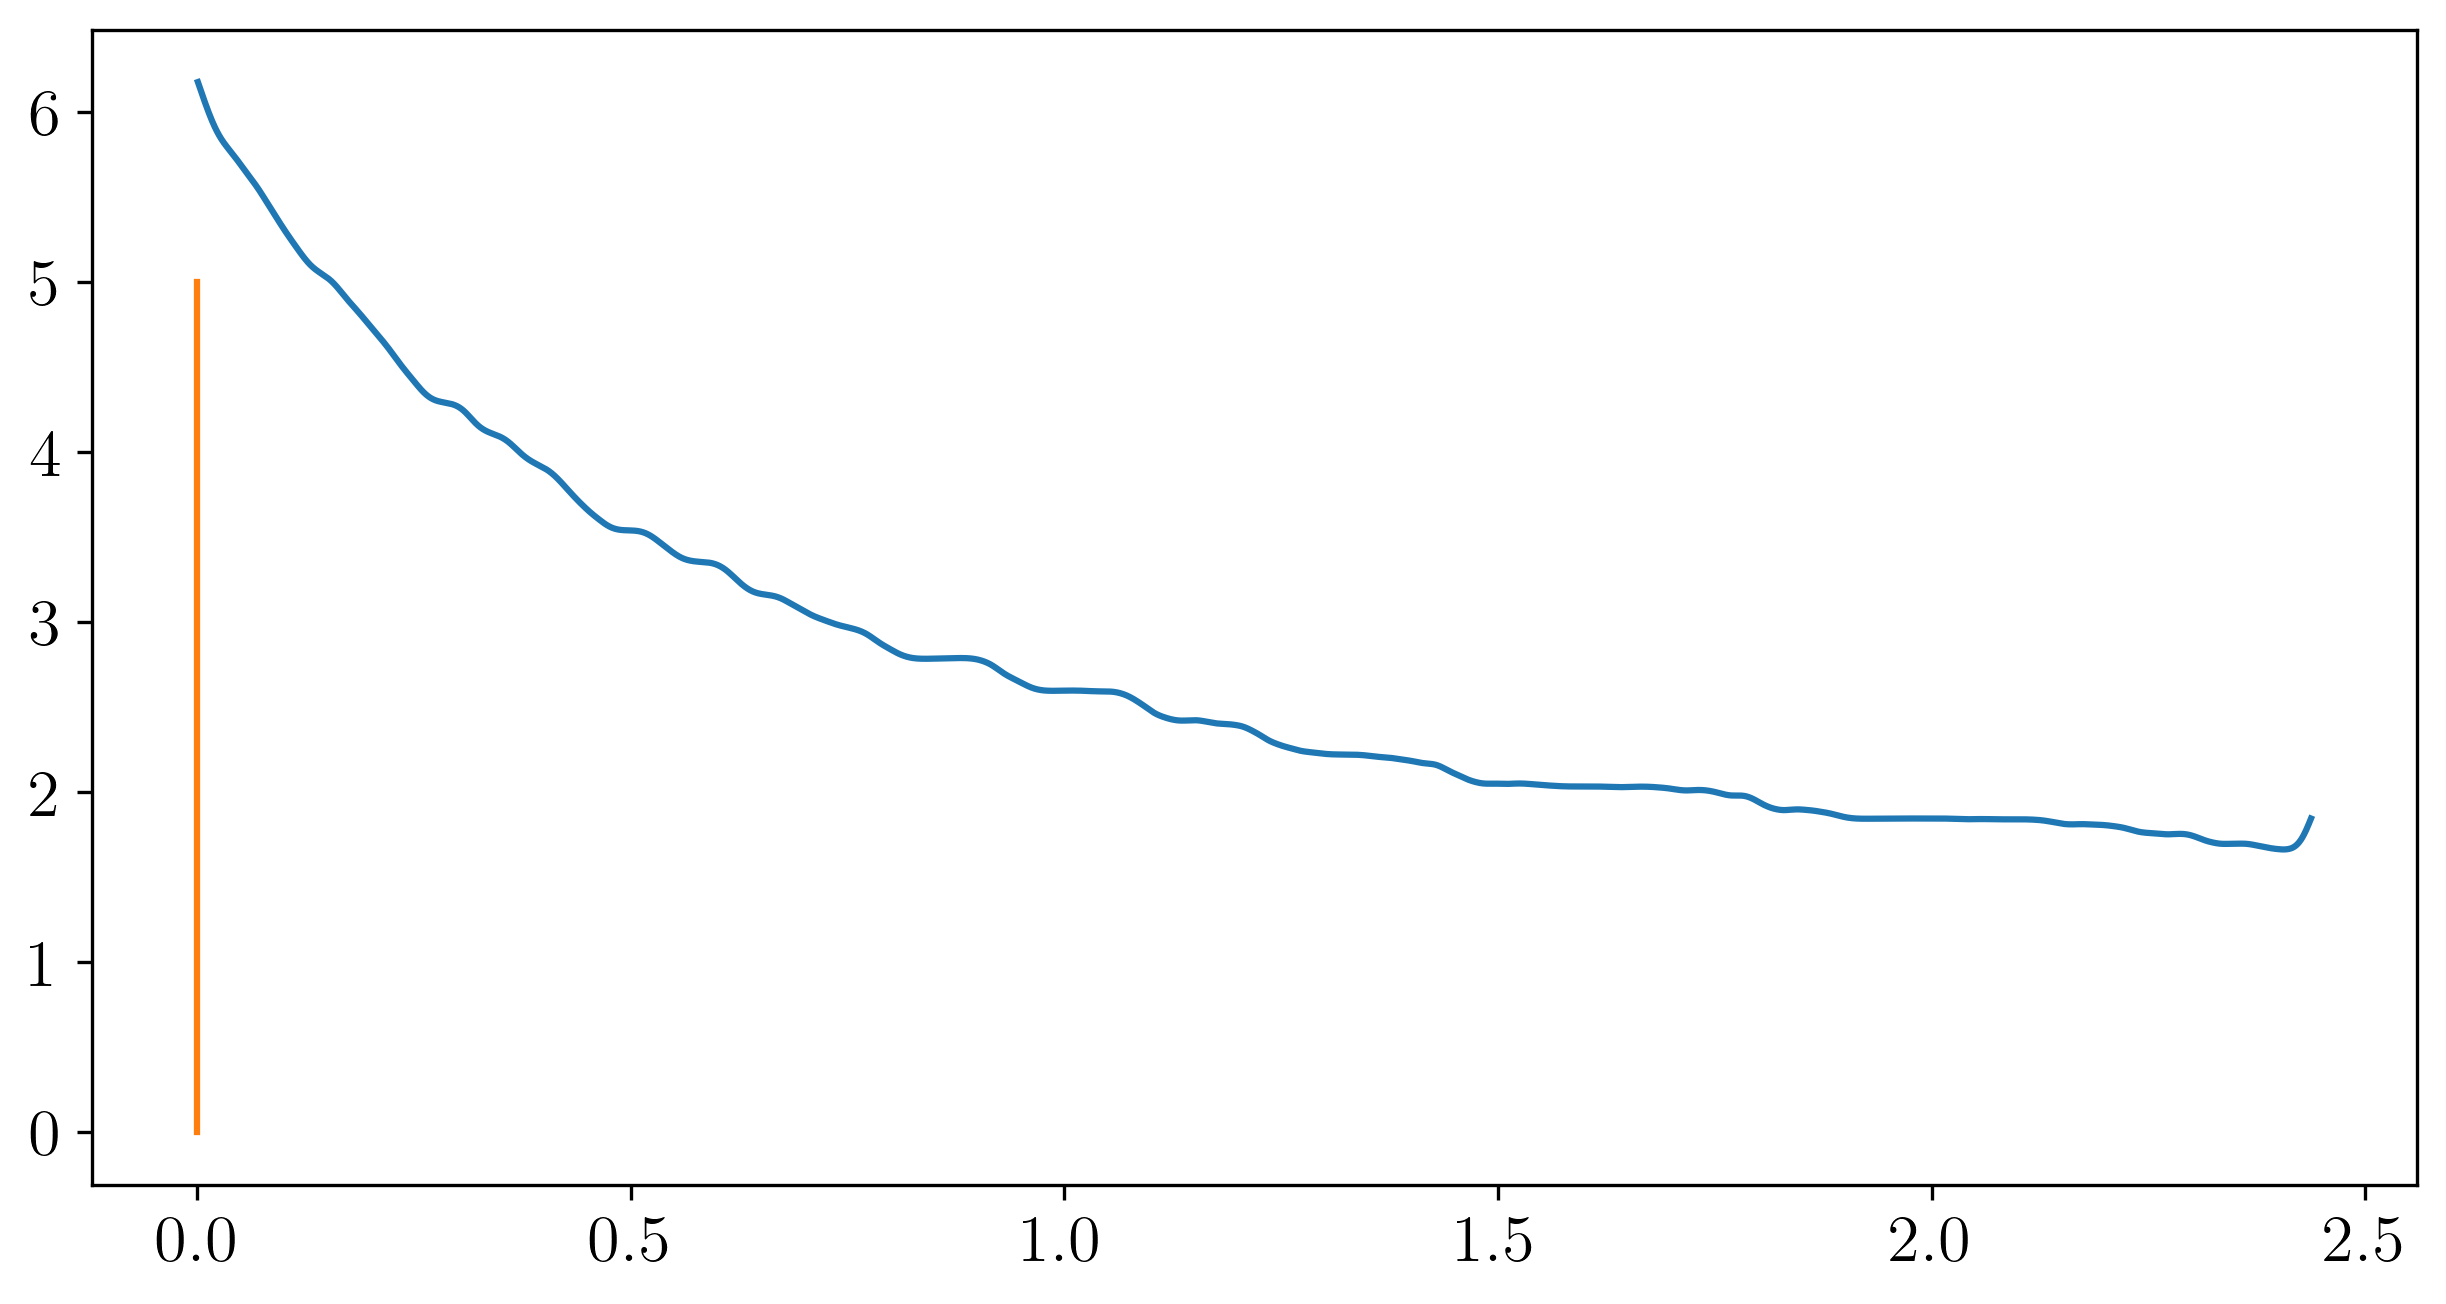

In [316]:
if "4-2" in p22:
    T_pico = data_pico[:, 0]-2.5
if "8-1" in p22:
    T_pico = data_pico[:, 0]-0.75

if "16-1" in p22:
    T_pico = data_pico[:, 0]-0.42



mask = (T_pico < np.max(T)) & (T_pico > 0)
T_pico = T_pico[mask]
P_pico = V_to_P(data_pico[:, 1][mask])
plt.plot(T_pico, P_pico)
plt.plot([0, 0], [0, 5])

In [317]:
V_pico = np.interp(T_pico, T, Vs)

In [318]:
from scipy.ndimage import gaussian_filter

In [319]:
# from scipy.optimize import curve_fit

# def f(x, A, B): # this is your 'straight line' y=f(x)
#     return A*x + B

# popt, pcov = curve_fit(f, x, y) # your data x, y to fi

In [320]:

slope, intercept = np.polyfit(T_pico, np.gradient(gaussian_filter(V_pico, sigma=5))/np.gradient(T_pico), deg=1)

In [321]:
# a3, a2, a1, a0 = np.polyfit(T_pico, V_pico, deg=3)
a2, a1, a0 = np.polyfit(T_pico, V_pico, deg=2)
a3 = 0

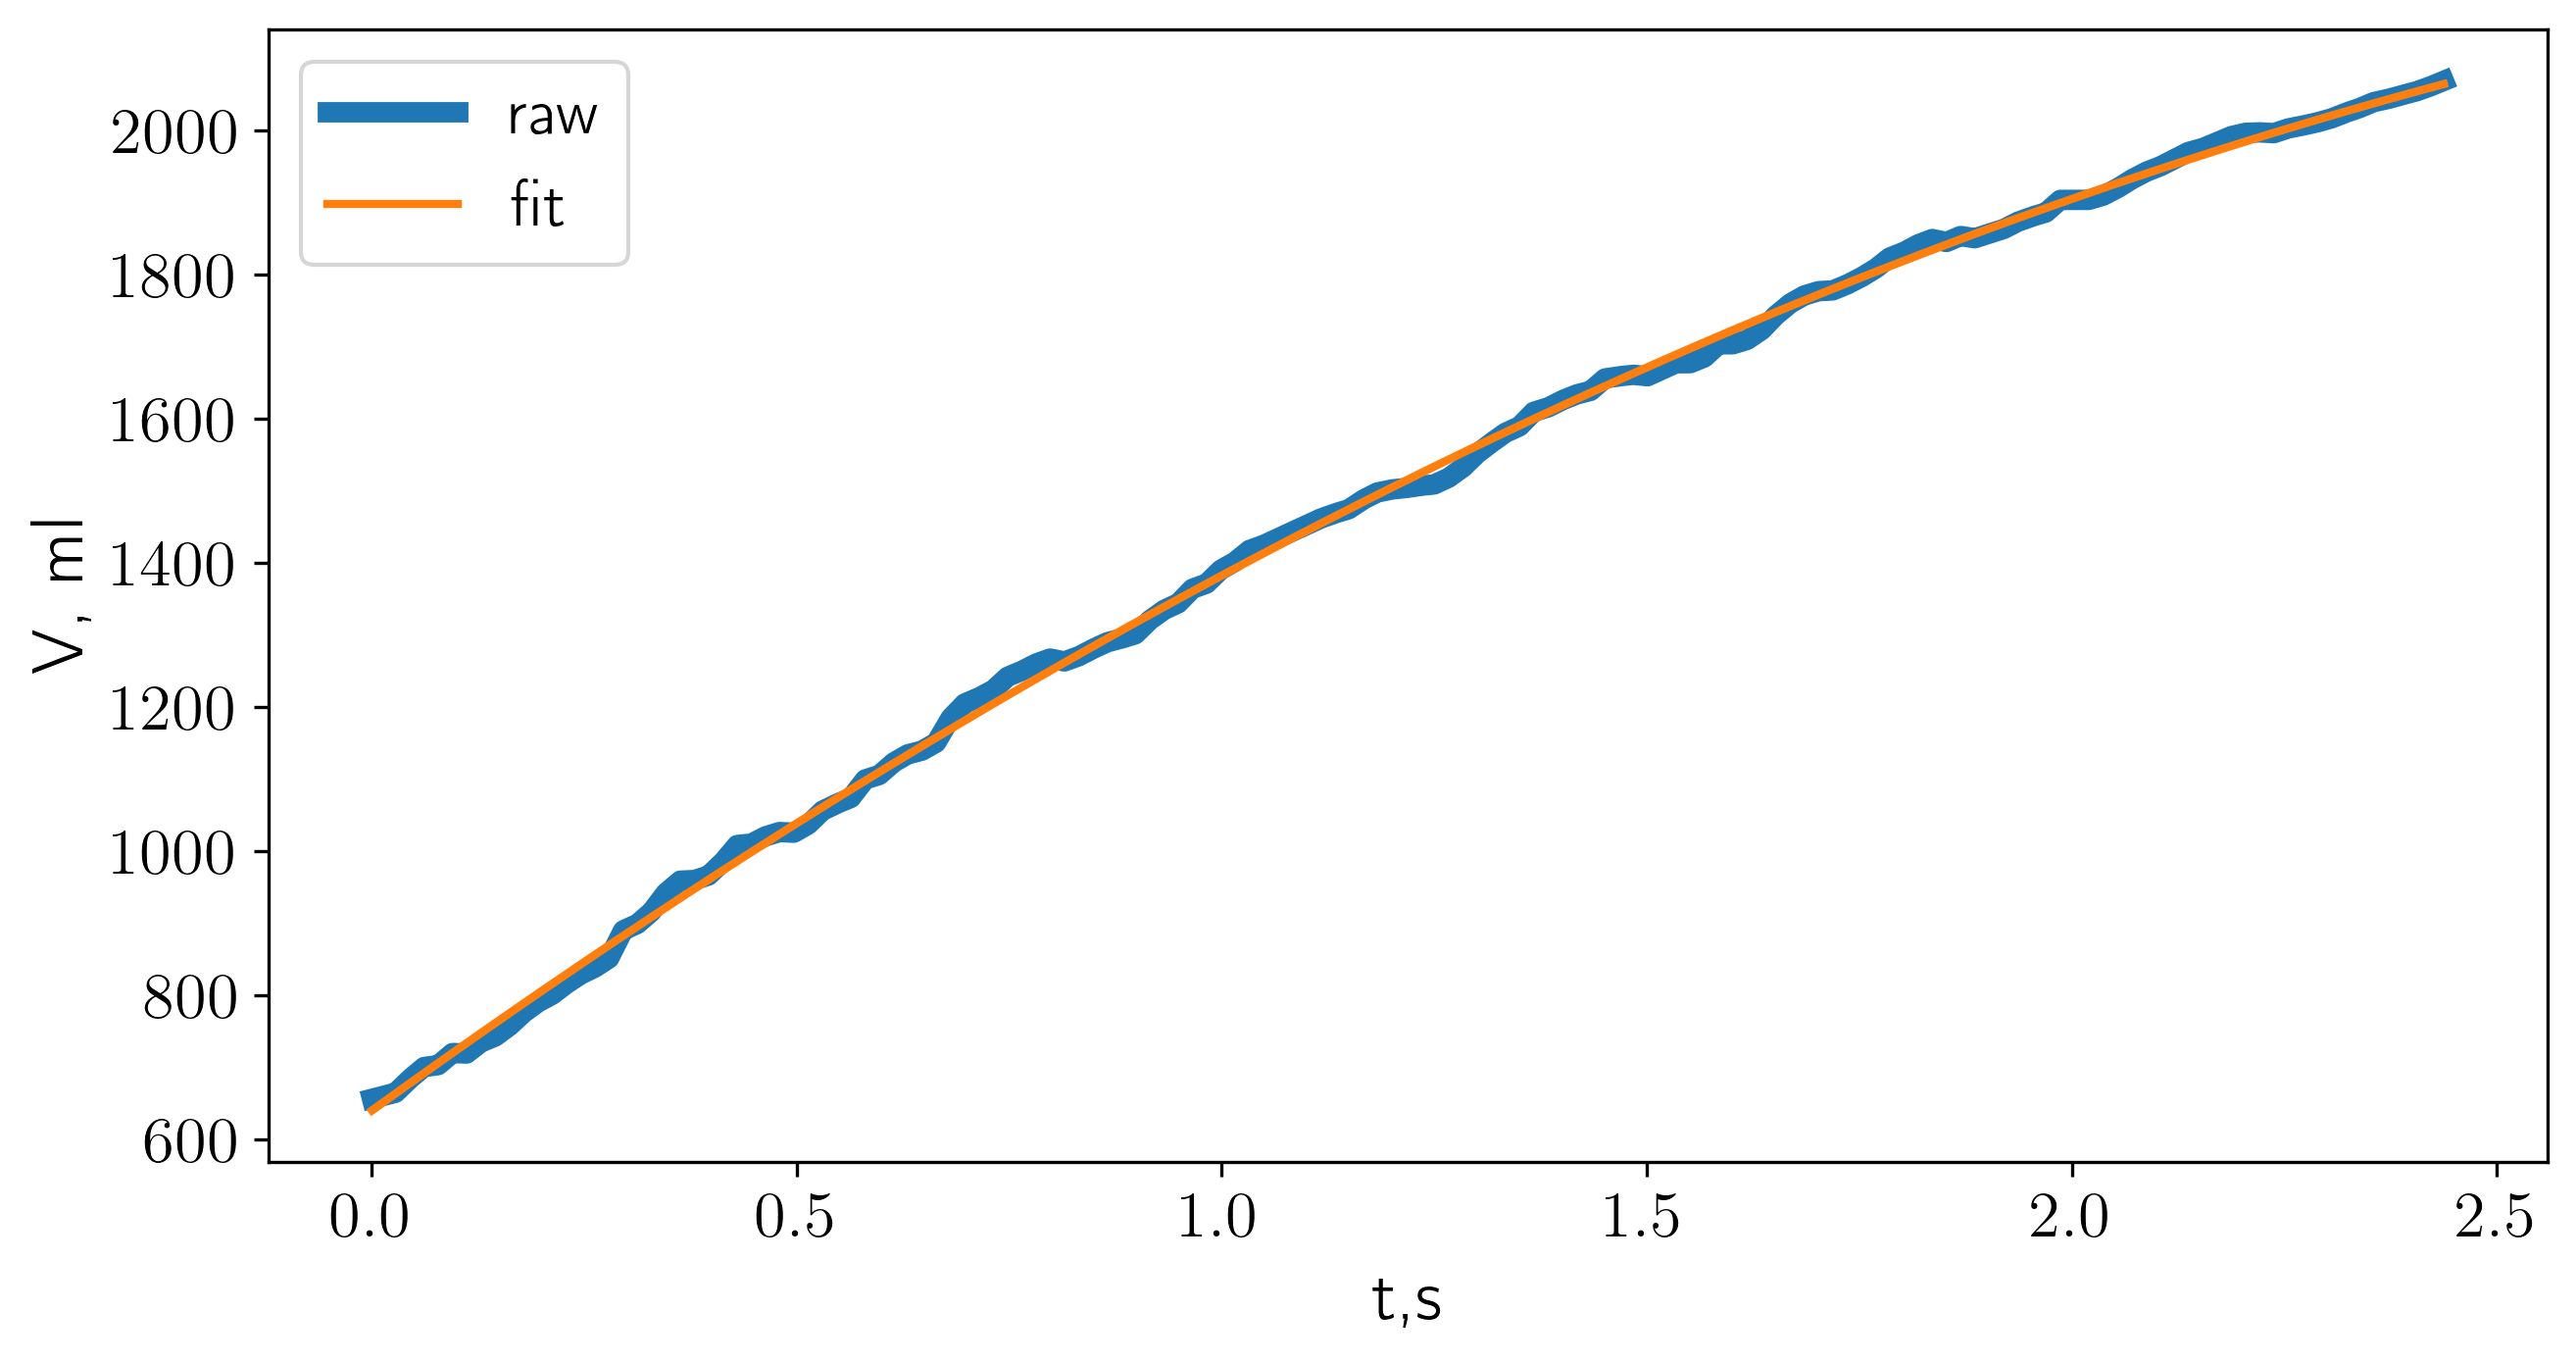

In [322]:
plt.plot(T_pico, V_pico, linewidth=5, label="raw")
plt.plot(T_pico, a3*T_pico**3 + a2*T_pico**2 + a1*T_pico + a0, linewidth=2, label="fit")
plt.xlabel("t,s")
plt.ylabel("V, ml")
plt.legend()

In [323]:
b2 = a3*3
b1 = a2*2
b0 = a1

In [265]:
b2,b1,b0

(0, np.float64(-220.0282230596071), np.float64(852.6104709748581))

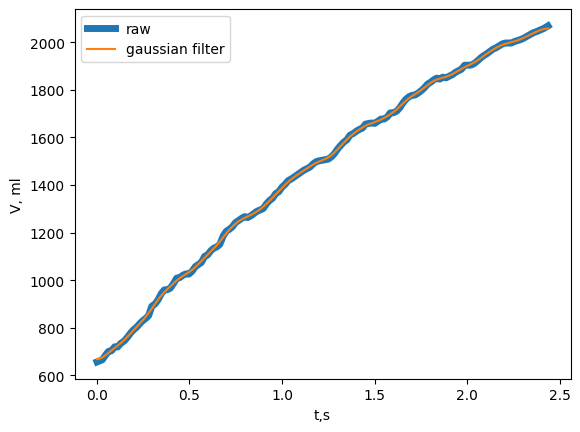

In [266]:
plt.plot(T_pico, V_pico, linewidth=5, label="raw")
plt.plot(T_pico, gaussian_filter(V_pico, sigma=50), label="gaussian filter")
plt.xlabel("t,s")
plt.ylabel("V, ml")
plt.legend()

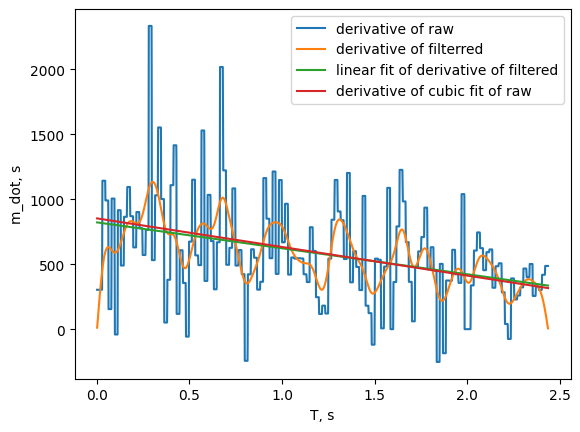

In [267]:
plt.plot(T_pico, np.gradient(V_pico)/np.gradient(T_pico), label="derivative of raw")
plt.plot(T_pico, np.gradient(gaussian_filter(V_pico, sigma=50))/np.gradient(T_pico), label="derivative of filterred")
plt.plot(T_pico, T_pico*slope + intercept, label="linear fit of derivative of filtered")
plt.plot(T_pico, b2*T_pico**2 + b1*T_pico + b0, label="derivative of cubic fit of raw")
plt.xlabel("T, s")
plt.ylabel("m_dot, s")
plt.legend()

In [268]:
mask = P_pico > -1

Text(0.5, 0, 'P, atm')

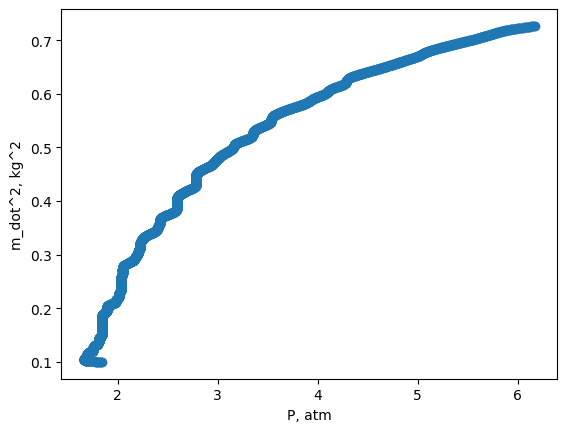

In [269]:
plt.scatter(P_pico[mask], ((b2*T_pico**2 + b1*T_pico + b0)/1000)**2)
# plt.plot()
plt.ylabel("m_dot^2, kg^2")
plt.xlabel("P, atm")

Text(0.5, 0, 'P, atm')

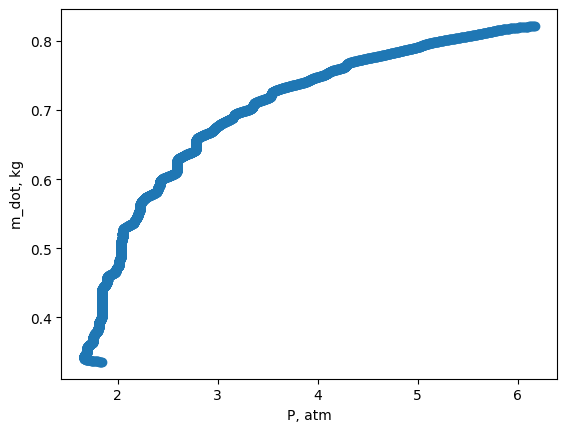

In [270]:
plt.scatter(P_pico[mask], ((T_pico[mask]*slope + intercept)/1000))
# plt.plot()
plt.ylabel("m_dot, kg")
plt.xlabel("P, atm")

In [271]:
# plt.plot(T_pico, np.gradient(gaussian_filter(V_pico, sigma=20))/np.gradient(T_pico))


In [272]:
gamma = 1.4

In [273]:
def fit_b_K(P,V):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, P):
        b, K = beta
        return K * P**b

    rdata = RealData(P, V, 0.2, 1)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[-1, 3000])
    output = odr.run()
    return output.beta

In [274]:
def fit_gamma_K(P,V):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        g, K = beta
        return K * V**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[1, 1000])
    output = odr.run()
    return output.beta

In [275]:
def fit_K(P,V, g):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        K, = beta
        return K * V**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[4000])
    output = odr.run()
    return output.beta

In [276]:
def fit_K_V0(P,V, g):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        K, V0 = beta
        return K * (V-V0)**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[4000, 0])
    output = odr.run()
    return output.beta

In [277]:
# def fit_K_(P,V, g):
#     from scipy.odr import ODR, Model, Data, RealData
#     from scipy.optimize import curve_fit
#     def f(beta, P):
#         K, = beta
#         return K * P**(1/-g)

#     rdata = RealData(P, V, 0.2, 1)
#     model = Model(f)
#     odr = ODR(rdata, model, beta0=[1000])
#     output = odr.run()
#     return output.beta

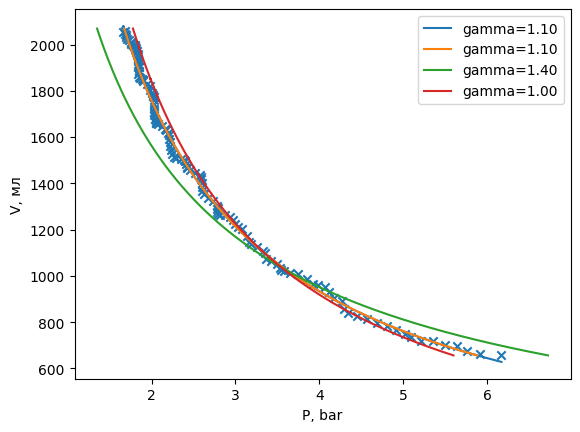

In [278]:
plt.scatter(P_pico[::30], V_pico[::30], marker="x")
b, K = fit_b_K(P_pico, V_pico)

gamma = -1/b

plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
gamma, K = fit_gamma_K(P_pico, V_pico)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

gamma = 1.4
K, = fit_K(P_pico, V_pico, gamma)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")


gamma = 1
K, = fit_K(P_pico, V_pico, gamma)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

# gamma = 1
# K,V0 = fit_K_V0(P_pico, V_pico, gamma)
# plt.plot(K * (V_pico-V0)**(-gamma), V_pico, label=f"gamma={gamma:.2f}")


# gamma = 1
# K, = fit_K_(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")



plt.xlabel("P, bar")
plt.ylabel("V, мл")
plt.legend()

In [279]:
# def get_pretty_PV(P, V):
    

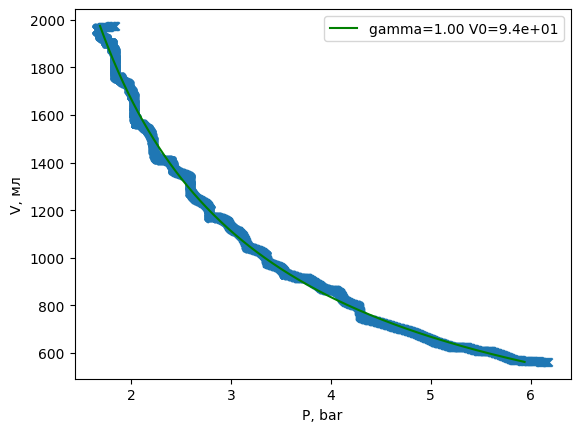

In [280]:
# plt.scatter(P_pico, V_pico, marker="x")
# b, K = fit_b_K(P_pico, V_pico)

# gamma = -1/b

# plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
# gamma, K = fit_gamma_K(P_pico, V_pico)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

# gamma = 1.4
# K, = fit_K(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")


# gamma = 1
# K, = fit_K(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

# gamma = 1
# K,V0 = fit_K_V0(P_pico, V_pico, gamma)
# plt.plot(K * (V_pico-V0)**(-gamma), V_pico-V0, label=f"gamma={gamma:.2f} V0={(V0):.2}", c="r")


gamma = 1.0
K,V0 = fit_K_V0(P_pico, V_pico, gamma)
plt.plot(K * (V_pico-V0)**(-gamma), V_pico-V0, label=f"gamma={gamma:.2f} V0={(V0):.2}", c="g")

plt.scatter(P_pico, V_pico-V0, marker="x")
# gamma = 1
# K, = fit_K_(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")



plt.xlabel("P, bar")
plt.ylabel("V, мл")
plt.legend()

In [281]:
ref_V

array([ 190.,  660., 1130., 1600.])

In [282]:
# plt.scatter(P_pico, V_pico)
# b, K = fit_gamma_K(P_pico, V_pico)

# # gamma = -1/b

# plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
# plt.xlabel("P, bar")
# plt.ylabel("V, мл")
# plt.legend()

/tmp/ipykernel_708707/190007786.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


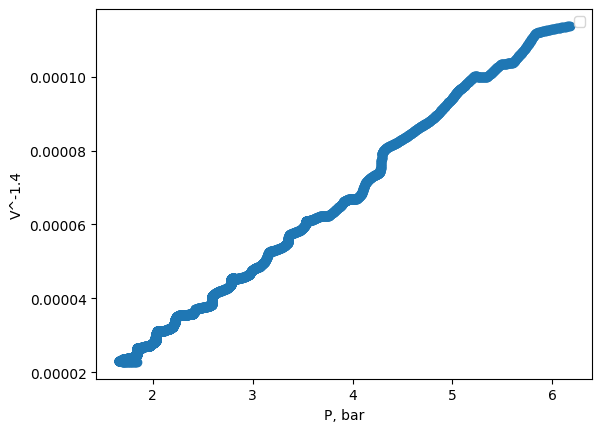

In [283]:
plt.scatter(P_pico, V_pico**(-1.4))
plt.xlabel("P, bar")
plt.ylabel("V^-1.4")
plt.legend()

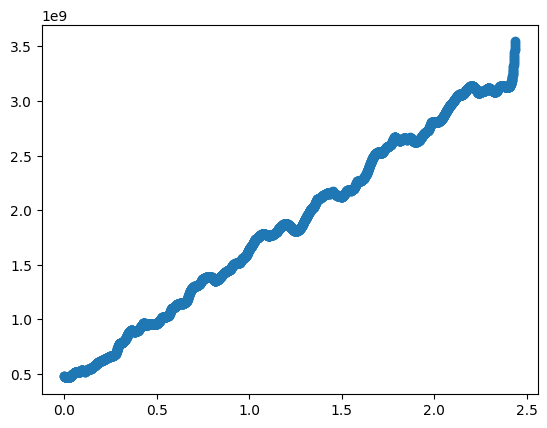

In [284]:
plt.scatter(T_pico, np.power(V_pico,2.8) * P_pico)

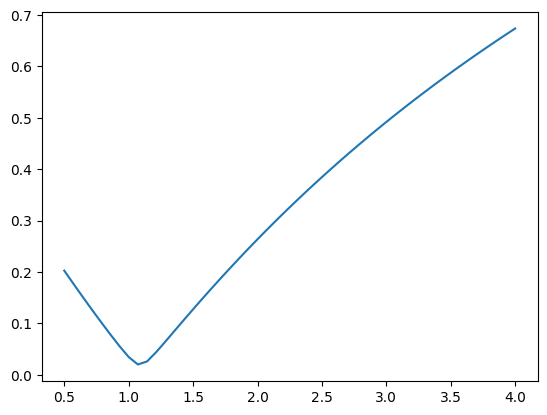

In [285]:
nnnnn = []
gamma = np.linspace(0.5, 4, 50)
for g in gamma:
    seq = np.power(V_pico,g) * P_pico
    nnnnn.append(np.std(seq/np.mean(seq)))
plt.plot(gamma, nnnnn)